In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data,train_labels), (test_data,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

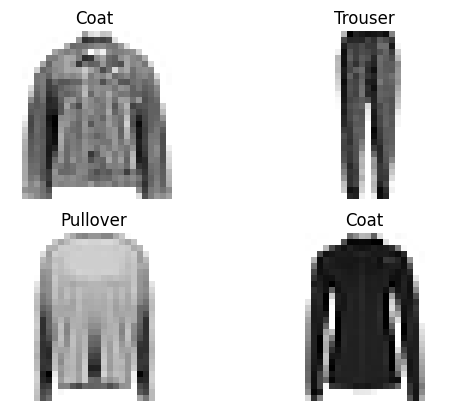

In [ ]:
import random
for i in range(4):
  index = random.randint(0,len(train_data))
  plt.subplot(2,2,i+1)
  plt.imshow(train_data[index],cmap = plt.cm.binary)
  plt.title(class_names[train_labels[index]])
  plt.axis(False)

In [ ]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(10,activation = "softmax"),
])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.experimental.RMSprop(0.001),
              metrics = ['accuracy'])
history = model.fit(train_data_norm,train_labels,epochs = 30,verbose = 1,validation_data = (test_data_norm,test_labels))

Epoch 1/30
1875/1875 [==============================] - 16s 6ms/step - loss: 0.8078 - accuracy: 0.7187 - val_loss: 0.5861 - val_accuracy: 0.7938
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5115 - accuracy: 0.8223 - val_loss: 0.5470 - val_accuracy: 0.8148
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4700 - accuracy: 0.8376 - val_loss: 0.4998 - val_accuracy: 0.8270
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4508 - accuracy: 0.8442 - val_loss: 0.4957 - val_accuracy: 0.8272
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4378 - accuracy: 0.8476 - val_loss: 0.4902 - val_accuracy: 0.8285
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4264 - accuracy: 0.8511 - val_loss: 0.4783 - val_accuracy: 0.8352
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4195 - accuracy: 0.8541 - val_loss: 0.5004 - val_accuracy

<Axes: >

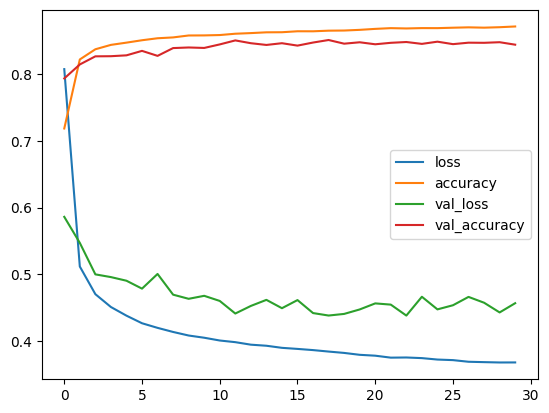

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
import itertools
from  sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true,y_pred,classes = None,figsize = (10,10),text_size = 15):

  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis = 1)[:,np.newaxis]   #Normalize our confusion matrix
  n_classes = cm.shape[0]

  fig,ax = plt.subplots(figsize = figsize)
  cax = ax.matshow(cm,cmap = plt.cm.Blues)
  fig.colorbar(cax)
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
        xlabel = "Predicted label",
        ylabel = "True Label",
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels
        )
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = 'center',
    color = 'white' if cm[i,j]> threshold else "black",
    size = text_size*0.8
    )

In [ ]:
y_probs = model.predict(test_data_norm)
y_preds = y_probs.argmax(axis = 1)

313/313 [==============================] - 1s 1ms/step


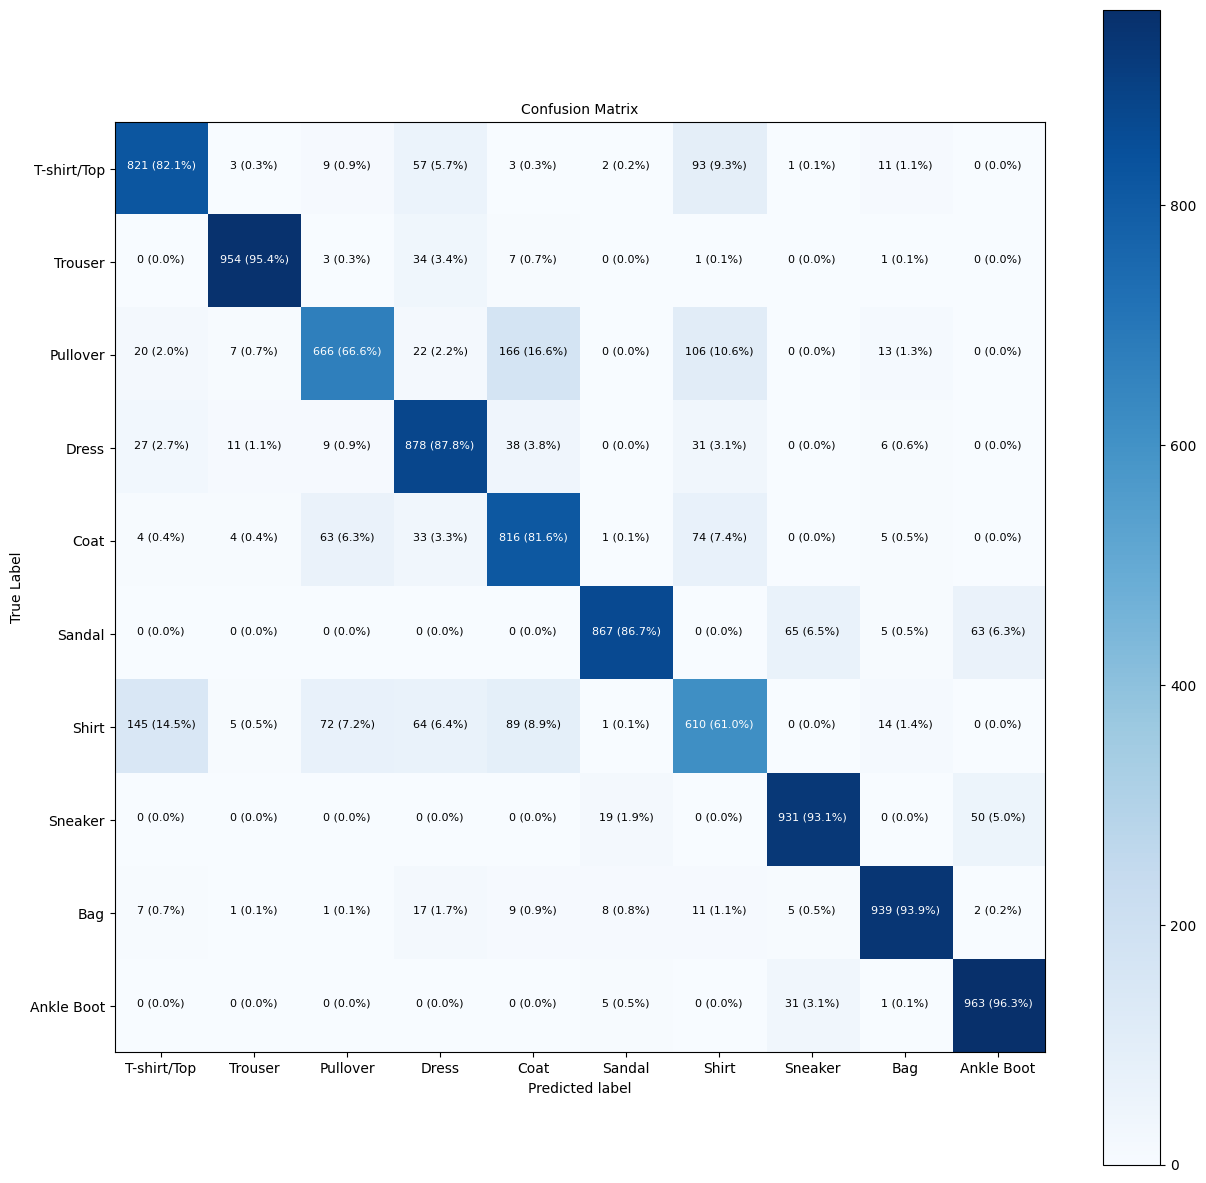

In [ ]:
make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,figsize = (15,15),
                      text_size = 10)

In [ ]:
def plot_random_image(model, images, true_labels, classes):
    plt.figure(figsize=(8, 8))
    for i in range(4):
        index = random.randint(0, len(images) - 1)
        target_image = images[index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[index]]

        plt.subplot(2, 2, i + 1)
        plt.imshow(target_image, cmap=plt.cm.binary)
        if pred_label == true_label:
            color = "green"
        else:
            color = "red"
        plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                          100 * tf.reduce_max(pred_probs),
                                                          true_label),
                   color=color)
    plt.tight_layout()
    plt.show()


1/1 [==============================] - 0s 17ms/step


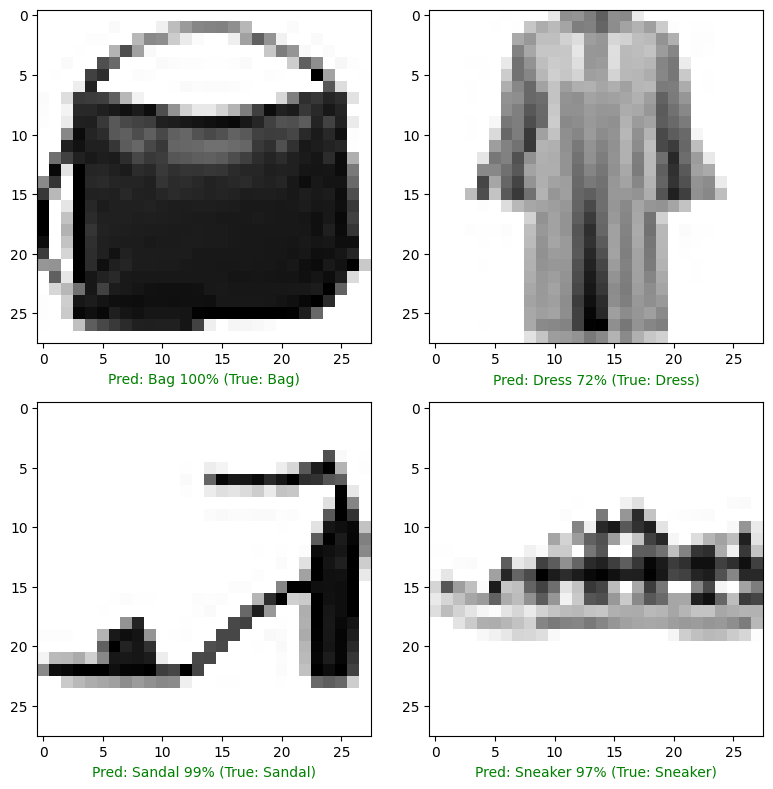

In [ ]:
plot_random_image(model = model,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)